In [1]:
# import pandas
import pandas as pd              
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

# define support function
def inspect_data(df, col=None, n_rows=5):
    # check data shape
    print(f'data shape: {df.shape}')
    
    # define columns
    if col is None:
        col = df.columns
    
    # check data head, use display function to display dataframe
    display(df[col].head(n_rows))
    
def check_missing(df, cut_off=0, sort=True):
    freq=df.isnull().sum()
    percent=df.isnull().sum()/df.shape[0]*100
    types=df.dtypes
    unique=df.apply(pd.unique).to_frame(name='Unique Values')['Unique Values']
    unique_counts = df.nunique(dropna=False)
    df_miss=pd.DataFrame({'missing_percentage':percent,'missing_frequency':freq,'types':types,'count_value':unique_counts,
                          'unique_values':unique})
    if sort:df_miss.sort_values(by='missing_frequency',ascending=False, inplace=True)
    return df_miss[df_miss['missing_percentage']>=cut_off]

# load file
# app_test = pd.read_csv('application_test.csv')
app_train = pd.read_csv('application_train.csv')
# bureau = pd.read_csv('bureau.csv')
# bur_bal = pd.read_csv('bureau_balance.csv')
# cc_bal = pd.read_csv('credit_card_balance.csv')
# ins_pay = pd.read_csv('installments_payments.csv')
# pc_bal = pd.read_csv('POS_CASH_balance.csv')
# prev_app = pd.read_csv('previous_application.csv')
# samp_sub = pd.read_csv('sample_submission.csv')

In [2]:
inspect_data(app_train)

data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
check_missing(app_train)

,missing_percentage,missing_frequency,types,count_value,unique_values
COMMONAREA_MEDI,69.872297,214865,float64,3203,"[0.0144, 0.0608, nan, 0.0585, 0.115, 0.0018, 0..."
COMMONAREA_AVG,69.872297,214865,float64,3182,"[0.0143, 0.0605, nan, 0.0582, 0.1143, 0.0018, ..."
COMMONAREA_MODE,69.872297,214865,float64,3129,"[0.0144, 0.0497, nan, 0.0587, 0.1153, 0.0018, ..."
NONLIVINGAPARTMENTS_MODE,69.432963,213514,float64,168,"[0.0, nan, 0.0195, 0.0078, 0.0039, 0.0661, 0.1..."
NONLIVINGAPARTMENTS_AVG,69.432963,213514,float64,387,"[0.0, 0.0039, nan, 0.0193, 0.0077, 0.0019, 0.0..."
NONLIVINGAPARTMENTS_MEDI,69.432963,213514,float64,215,"[0.0, 0.0039, nan, 0.0194, 0.0078, 0.0019, 0.0..."
FONDKAPREMONT_MODE,68.386172,210295,object,5,"[reg oper account, nan, org spec account, reg ..."
LIVINGAPARTMENTS_MODE,68.354953,210199,float64,737,"[0.022, 0.079, nan, 0.1313, 0.3113, 0.0248, 0...."
LIVINGAPARTMENTS_AVG,68.354953,210199,float64,1869,"[0.0202, 0.0773, nan, 0.1202, 0.2849, 0.0227, ..."
LIVINGAPARTMENTS_MEDI,68.354953,210199,float64,1098,"[0.0205, 0.0787, nan, 0.1223, 0.2899, 0.0231, ..."


In [4]:
# change target value

decode_map = {0: "No Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

app_train['TARGET'] = app_train['TARGET'].apply(lambda x: decode_sentiment(x))

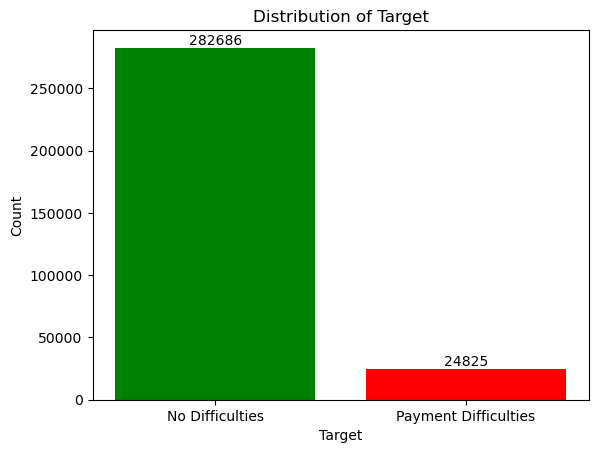

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the occurrences of each loan category
loan_category_counts = app_train['TARGET'].value_counts()

# set colors for different loan categories
colors = ['green', 'red']

# plot the distribution of loan label
plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target')

# set x-axis ticks to only show 0 and 1
plt.xticks([0, 1])

# add values on top of the bars
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

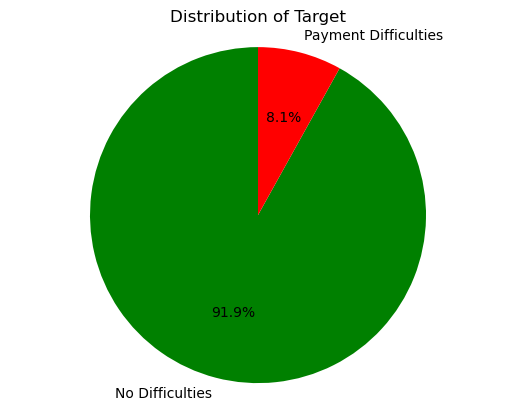

In [6]:
loan_category_counts = app_train['TARGET'].value_counts()

# Set colors for different loan categories
colors = ['green', 'red']

# Plot a pie chart for the distribution of loan label
plt.pie(loan_category_counts.values, labels=loan_category_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Target')

plt.show()

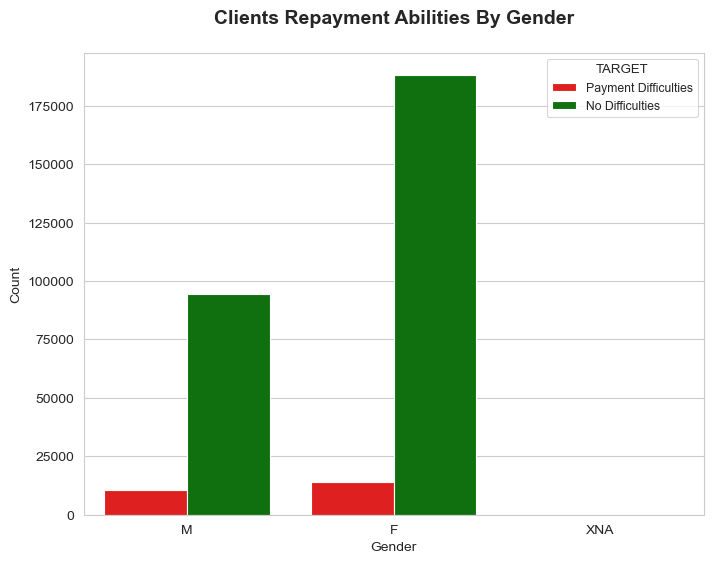

In [7]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('paper', font_scale=1)

ax.set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data=app_train, hue='TARGET', 
              palette={'No Difficulties': 'green', 'Payment Difficulties': 'red'}, ax=ax)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [8]:
gender = app_train.groupby(by=['CODE_GENDER', 'TARGET'], as_index=False)['TARGET'].count()
gender = gender.rename(columns={'TARGET': 'SK_ID_CURR'})
gender['Percentage'] = gender.groupby('CODE_GENDER')['SK_ID_CURR'].transform(lambda x: x / x.sum() * 100)

print('Clients Repayment Abilities By Gender')
gender = gender.sort_values(by=['CODE_GENDER', 'SK_ID_CURR'], ascending=[True, False])
gender.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Gender


,CODE_GENDER,SK_ID_CURR,Percentage
0,F,188278,93.000672
1,F,14170,6.999328
2,M,94404,89.858080
3,M,10655,10.141920
4,XNA,4,100.000000


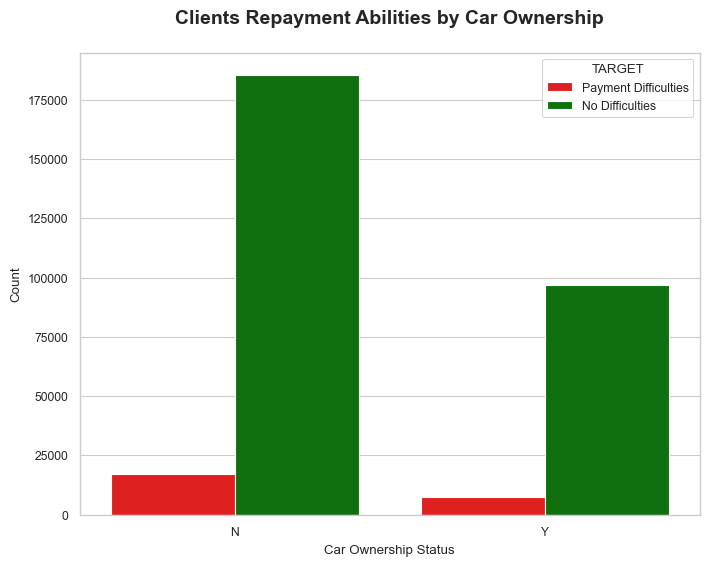

In [9]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('paper', font_scale=1)

ax.set_title('Clients Repayment Abilities by Car Ownership\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data=app_train, hue='TARGET', 
              palette={'No Difficulties': 'green', 'Payment Difficulties': 'red'}, ax=ax)

plt.xlabel('Car Ownership Status')
plt.ylabel('Count')
plt.show()

In [10]:
car = app_train.groupby(by=['FLAG_OWN_CAR', 'TARGET'], as_index=False)['TARGET'].count()
car = car.rename(columns={'TARGET': 'SK_ID_CURR'})
car['Percentage'] = car.groupby('FLAG_OWN_CAR')['SK_ID_CURR'].transform(lambda x: x / x.sum() * 100)

print('Clients Repayment Abilities By Car Ownership')
car = car.sort_values(by=['FLAG_OWN_CAR', 'SK_ID_CURR'], ascending=[True, False])
car.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Car Ownership


,FLAG_OWN_CAR,SK_ID_CURR,Percentage
0,N,185675,91.499773
1,N,17249,8.500227
2,Y,97011,92.756270
3,Y,7576,7.243730


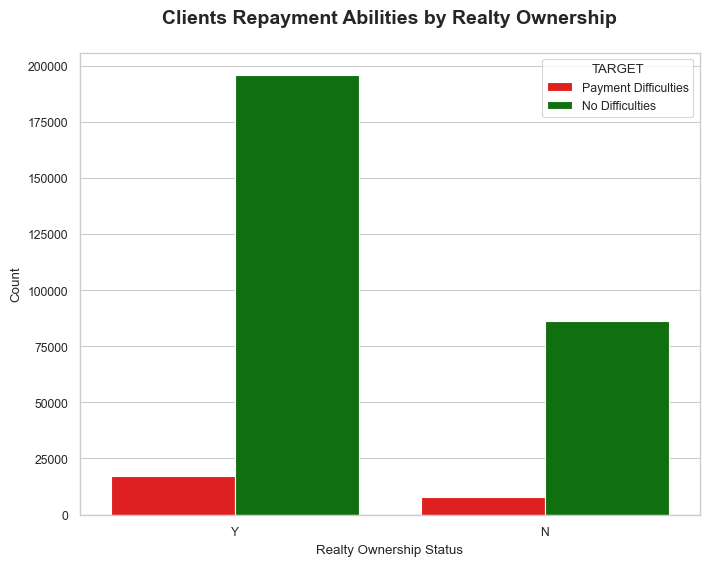

In [11]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('paper', font_scale=1)

ax.set_title('Clients Repayment Abilities by Realty Ownership\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data=app_train, hue='TARGET', 
              palette={'No Difficulties': 'green', 'Payment Difficulties': 'red'}, ax=ax)

plt.xlabel('Realty Ownership Status')
plt.ylabel('Count')
plt.show()

In [12]:
real = app_train.groupby(by=['FLAG_OWN_REALTY', 'TARGET'], as_index=False)['TARGET'].count()
real = real.rename(columns={'TARGET': 'SK_ID_CURR'})
real['Percentage'] = real.groupby('FLAG_OWN_REALTY')['SK_ID_CURR'].transform(lambda x: x / x.sum() * 100)

print('Clients Repayment Abilities By Realty Ownership')
real = real.sort_values(by=['FLAG_OWN_REALTY', 'SK_ID_CURR'], ascending=[True, False])
real.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Realty Ownership


,FLAG_OWN_REALTY,SK_ID_CURR,Percentage
0,N,86357,91.675071
1,N,7842,8.324929
2,Y,196329,92.038423
3,Y,16983,7.961577


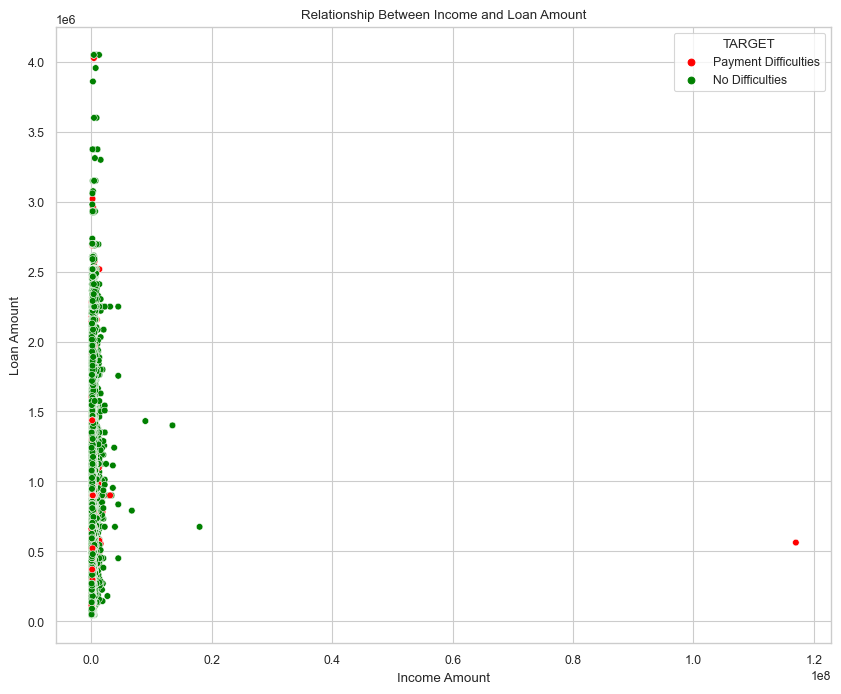

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=app_train, hue='TARGET', 
                palette={'No Difficulties': 'green', 'Payment Difficulties': 'red'})

plt.title('Relationship Between Income and Loan Amount')
plt.xlabel('Income Amount')
plt.ylabel('Loan Amount')

plt.show()

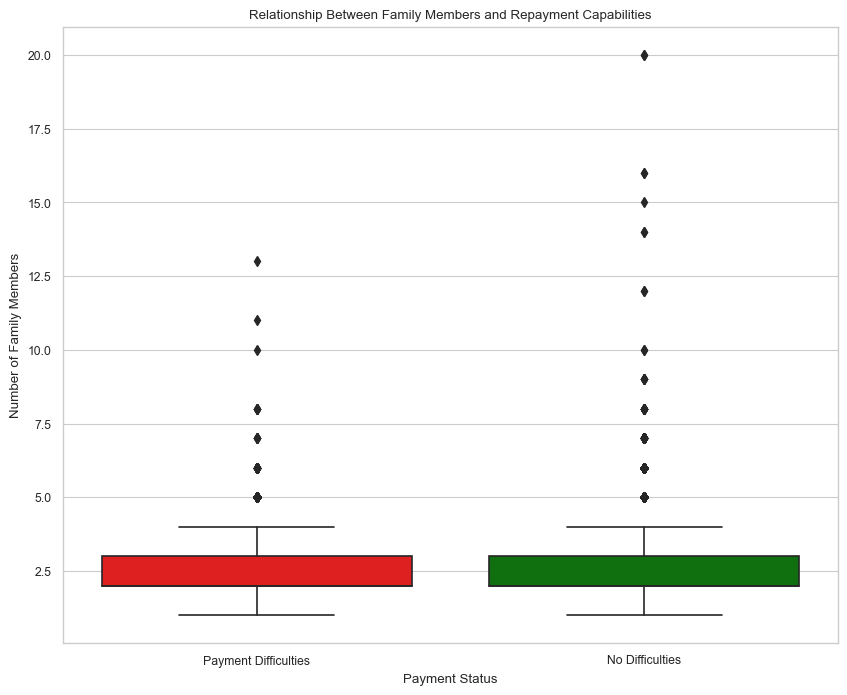

In [14]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='TARGET', y='CNT_FAM_MEMBERS', data=app_train, 
            palette={'No Difficulties': 'green', 'Payment Difficulties': 'red'})

plt.title('Relationship Between Family Members and Repayment Capabilities')
plt.xlabel('Payment Status')
plt.ylabel('Number of Family Members')

plt.show()

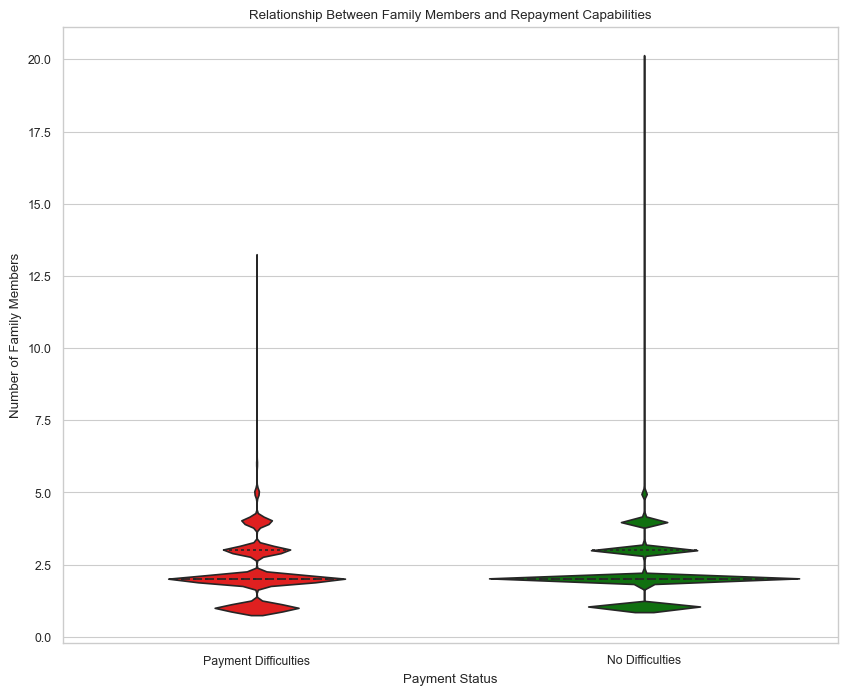

In [15]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='TARGET', y='CNT_FAM_MEMBERS', data=app_train, 
               palette={'No Difficulties': 'green', 'Payment Difficulties': 'red'}, inner='quartile')

plt.title('Relationship Between Family Members and Repayment Capabilities')
plt.xlabel('Payment Status')
plt.ylabel('Number of Family Members')

plt.show()

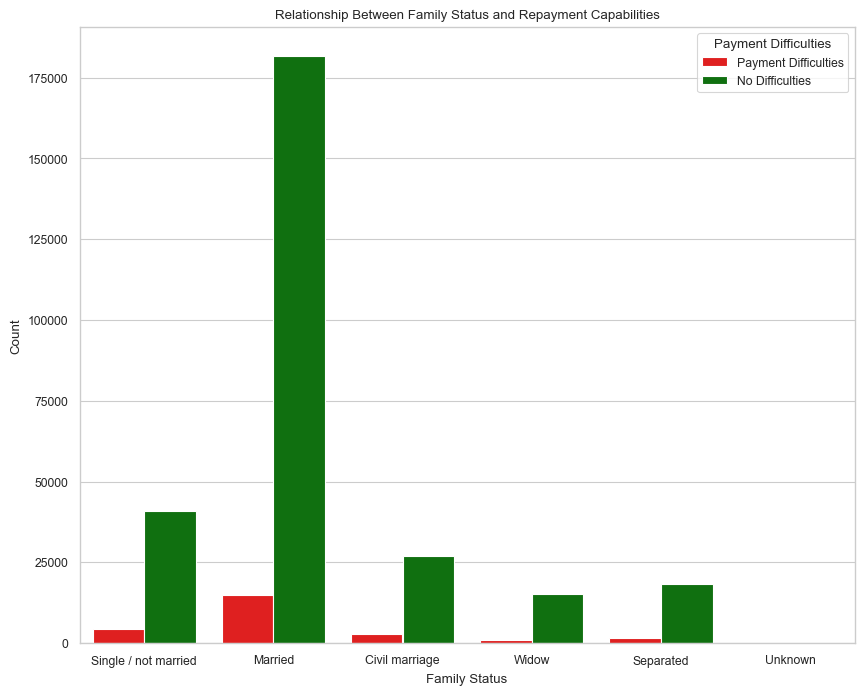

In [16]:
plt.figure(figsize=(10, 8))
sns.countplot(x='NAME_FAMILY_STATUS', data=app_train, hue='TARGET', 
              palette={'No Difficulties': 'green', 'Payment Difficulties': 'red'})
    
plt.title('Relationship Between Family Status and Repayment Capabilities')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.legend(title='Payment Difficulties')

plt.show()

In [17]:
family = app_train.groupby(by=['NAME_FAMILY_STATUS', 'TARGET'], as_index=False)['TARGET'].count()
family = family.rename(columns={'TARGET': 'SK_ID_CURR'})
family['Percentage'] = family.groupby('NAME_FAMILY_STATUS')['SK_ID_CURR'].transform(lambda x: x / x.sum() * 100)

print('Clients Repayment Abilities By Family Status')
family = family.sort_values(by=['NAME_FAMILY_STATUS', 'SK_ID_CURR'], ascending=[True, False])
family.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,SK_ID_CURR,Percentage
0,Civil marriage,26814,90.055416
1,Civil marriage,2961,9.944584
2,Married,181582,92.440132
3,Married,14850,7.559868
4,Separated,18150,91.805766
5,Separated,1620,8.194234
6,Single / not married,40987,90.192325
7,Single / not married,4457,9.807675
8,Unknown,2,100.000000
9,Widow,15151,94.175783


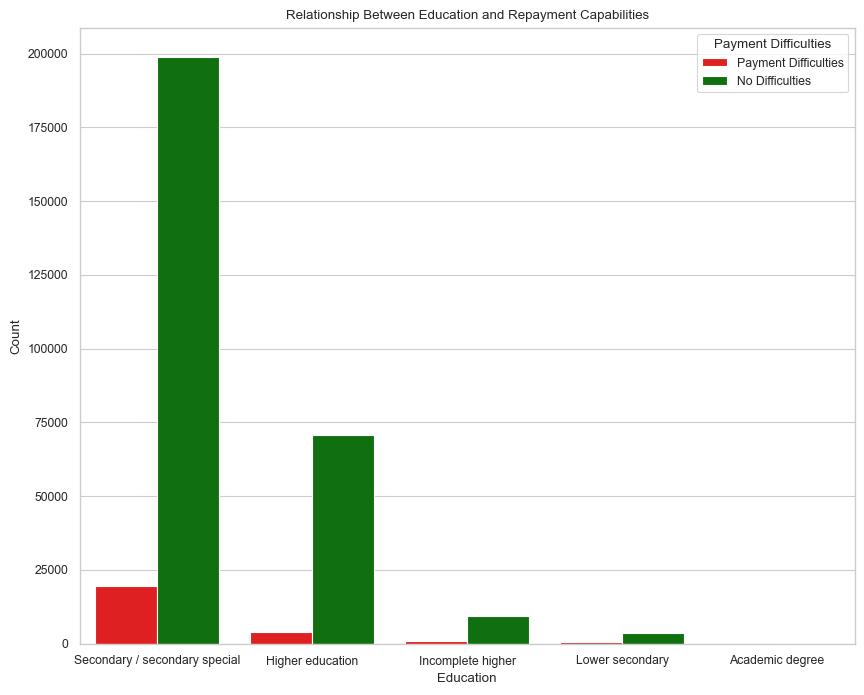

In [18]:
plt.figure(figsize=(10, 8))
sns.countplot(x='NAME_EDUCATION_TYPE', data=app_train, hue='TARGET', 
              palette={'No Difficulties': 'green', 'Payment Difficulties': 'red'})
    
plt.title('Relationship Between Education and Repayment Capabilities')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Payment Difficulties')

plt.show()

In [19]:
edu = app_train.groupby(by=['NAME_EDUCATION_TYPE', 'TARGET'], as_index=False)['TARGET'].count()
edu = edu.rename(columns={'TARGET': 'SK_ID_CURR'})
edu['Percentage'] = edu.groupby('NAME_EDUCATION_TYPE')['SK_ID_CURR'].transform(lambda x: x / x.sum() * 100)

print('Clients Repayment Abilities By Education')
edu = edu.sort_values(by=['NAME_EDUCATION_TYPE', 'SK_ID_CURR'], ascending=[True, False])
edu.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Education


,NAME_EDUCATION_TYPE,SK_ID_CURR,Percentage
0,Academic degree,161,98.170732
1,Academic degree,3,1.829268
2,Higher education,70854,94.644885
3,Higher education,4009,5.355115
4,Incomplete higher,9405,91.515034
5,Incomplete higher,872,8.484966
6,Lower secondary,3399,89.072327
7,Lower secondary,417,10.927673
8,Secondary / secondary special,198867,91.060071
9,Secondary / secondary special,19524,8.939929


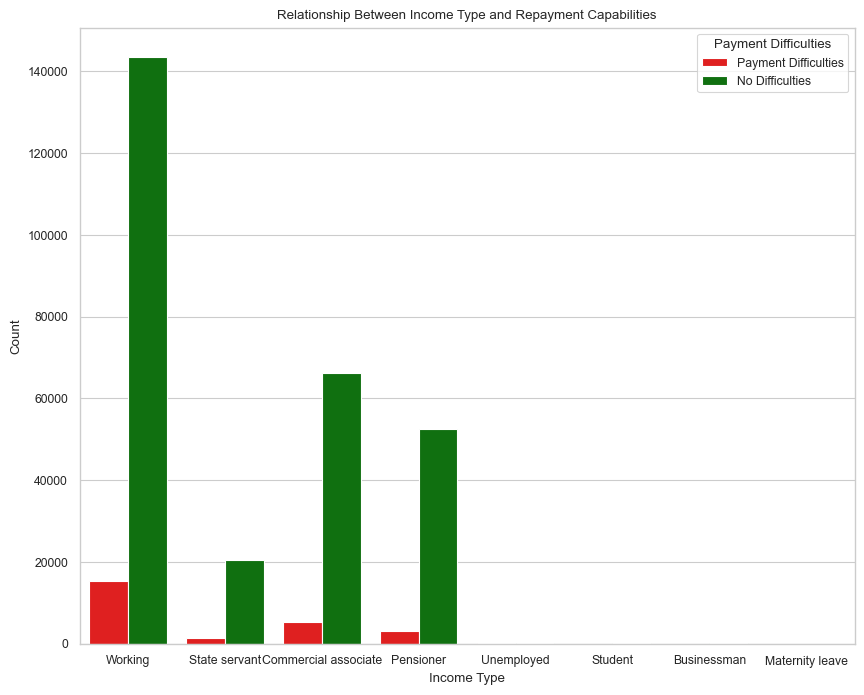

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(x='NAME_INCOME_TYPE', data=app_train, hue='TARGET', 
              palette={'No Difficulties': 'green', 'Payment Difficulties': 'red'})
    
plt.title('Relationship Between Income Type and Repayment Capabilities')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.legend(title='Payment Difficulties')

plt.show()

In [21]:
job = app_train.groupby(by=['NAME_INCOME_TYPE', 'TARGET'], as_index=False)['TARGET'].count()
job = job.rename(columns={'TARGET': 'SK_ID_CURR'})
job['Percentage'] = job.groupby('NAME_INCOME_TYPE')['SK_ID_CURR'].transform(lambda x: x / x.sum() * 100)

print('Clients Repayment Abilities By Income Type')
job = job.sort_values(by=['NAME_INCOME_TYPE', 'SK_ID_CURR'], ascending=[True, False])
job.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,SK_ID_CURR,Percentage
0,Businessman,10,100.000000
1,Commercial associate,66257,92.515743
2,Commercial associate,5360,7.484257
3,Maternity leave,3,60.000000
4,Maternity leave,2,40.000000
5,Pensioner,52380,94.613634
6,Pensioner,2982,5.386366
7,State servant,20454,94.245035
8,State servant,1249,5.754965
9,Student,18,100.000000
